In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [141]:
data = pd.read_excel(r"C:\Users\Anas\Desktop\data_fv.xlsx")
data.head()

Id WILAYA   SEXE   AGE1 Téléviseur 2_Téléviseurs 3_Téléviseurs_et_plus  \
0   1  Adrar  Femme  45-54          O             N                     N   
1  11  Adrar  Femme  35-44          N             O                     N   
2  16  Adrar  Femme  25-34          N             N                     O   
3  20  Adrar  Homme  15-24          N             N                     O   
4  34  Adrar  Homme    55+          N             N                     O   

  Au_moins_Un_Téléviseur Four électrique_&_micro-onde Lave-linge  ...  \
0                      O                            N          O  ...   
1                      O                            N          N  ...   
2                      O                            O          O  ...   
3                      O                            O          O  ...   
4                      O                            O          N  ...   

  Au_moins_un_Démodulateur Lap_top / PC_Portable Connexion_Internet_ADSL  \
0                        O                     O                       N   
1                        N                     N                       N   
2                        O                     N                       N   
3                        N                     O                       N   
4                        O                     O                       N   

  Tablettes Smartphone Connexion_Internet_3G Connexion_Internet_4G  \
0         O          O                     O                     N   
1         N          O                     O                     N   
2         O          N                     N                     N   
3         N          O                     N                     O   
4         O          N                     N                     N   

  Au_moins_une_connexion Possession_d'une_voiture_ménage  \
0                      O                     Une voiture   
1                      O                     Une voiture   
2                      N                     Une voiture   
3                      O                     Une voiture   
4                      N          Trois voitures ou plus   

  Revenu_global_du_ménage  
0                   50000  
1                   30000  
2                   30000  
3                   50000  
4                   50000  

[5 rows x 29 columns]

In [142]:
# Define the coefficients for each variable
coefficients = {
    "Téléviseur": 1,
    "2_Téléviseurs": 2,
    "3_Téléviseurs_et_plus": 3,
    "Console_de_jeux_vidéo_Play_Station_Wii": 5,
    "Lap_top / PC_Portable": 4,
    "Ordinateur_de_bureau": 3,
    "Tablettes": 3,
    "Smartphone": 2
}

# Create a new column called "Entertainment_Score" and assign a score to each row
data["Entertainment_Score"] = 0
for var, coef in coefficients.items():
    data.loc[(data[var] == "O"), "Entertainment_Score"] += coef

In [143]:
# Define the coefficients for each variable
coefficients = {
    "Four électrique_&_micro-onde": 4,
    "Lave-linge": 3,
    "Congélateur": 3,
    "Climatiseur": 5,
    "Lave-vaisselle": 4,
    "Machine_Sèche-linge": 3,
    "Démodulateurs_simples": 1,
    "Démodulateurs_numériques_avec_décodeurs": 2,
    "Démodulateurs / Mise_à_jour_sur_Internet": 3
}

# Create a new column called "Electromenager_Score" and assign a score to each row
data["Electromenager_Score"] = 0
for var, coef in coefficients.items():
    data.loc[(data[var] == "O"), "Electromenager_Score"] += coef


In [144]:
# Define the coefficients for each variable
coefficients = {
    "Connexion_Internet_ADSL": 2,
    "Connexion_Internet_3G": 1,
    "Connexion_Internet_4G": 3,
}

# Create a new column called "Telecom_Score" and assign a score to each row
data["Telecom_Score"] = 0
for var, coef in coefficients.items():
    data.loc[(data[var] == "O"), "Telecom_Score"] += coef


In [145]:
data["Possession_d'une_voiture_ménage"] = data["Possession_d'une_voiture_ménage"].replace({"Une voiture": 1, "Aucune": 0, "Deux voitures": 2, "Trois voitures ou plus": 3})
revenue_map = {
     20000: 1,
     30000: 2,
     50000: 3,
     70000: 3,
     90000: 4,
     125000: 5,
     225000: 6,
     300000: 7,
    
}

# Apply the mapping to the categorical variable
data['revenue_numeric'] = data['Revenu_global_du_ménage'].map(revenue_map)


In [146]:
data.head()

Id WILAYA   SEXE   AGE1 Téléviseur 2_Téléviseurs 3_Téléviseurs_et_plus  \
0   1  Adrar  Femme  45-54          O             N                     N   
1  11  Adrar  Femme  35-44          N             O                     N   
2  16  Adrar  Femme  25-34          N             N                     O   
3  20  Adrar  Homme  15-24          N             N                     O   
4  34  Adrar  Homme    55+          N             N                     O   

  Au_moins_Un_Téléviseur Four électrique_&_micro-onde Lave-linge  ...  \
0                      O                            N          O  ...   
1                      O                            N          N  ...   
2                      O                            O          O  ...   
3                      O                            O          O  ...   
4                      O                            O          N  ...   

  Smartphone Connexion_Internet_3G Connexion_Internet_4G  \
0          O                     O                     N   
1          O                     O                     N   
2          N                     N                     N   
3          O                     N                     O   
4          N                     N                     N   

  Au_moins_une_connexion Possession_d'une_voiture_ménage  \
0                      O                               1   
1                      O                               1   
2                      N                               1   
3                      O                               1   
4                      N                               3   

  Revenu_global_du_ménage Entertainment_Score Electromenager_Score  \
0                   50000                  13                    4   
1                   30000                   4                    0   
2                   30000                  14                   19   
3                   50000                   9                   15   
4                   50000                  13                   18   

  Telecom_Score revenue_numeric  
0             1               3  
1             1               2  
2             0               2  
3             3               3  
4             0               3  

[5 rows x 33 columns]

In [147]:
data_for_clustring=data[["Entertainment_Score","Electromenager_Score","Telecom_Score","revenue_numeric","Possession_d'une_voiture_ménage"]]

In [208]:
data_for_clustring=data_for_clustring.rename(columns={"Electromenager_Score":"Home_appliance","revenue_numeric":"Income","Possession_d'une_voiture_ménage":"Household_car"})

In [209]:
data_for_clustring

Entertainment_Score  Home_appliance  Telecom_Score  Income  \
0                       13               4              1       3   
1                        4               0              1       2   
2                       14              19              0       2   
3                        9              15              3       3   
4                       13              18              0       3   
...                    ...             ...            ...     ...   
28477                   15              13              3       1   
28478                   15              17              3       2   
28479                    3              11              0       2   
28480                    3               7              1       1   
28481                    5               3              1       1   

       Household_car  cluster  
0                  1        0  
1                  1        0  
2                  1        1  
3                  1        0  
4                  3        0  
...              ...      ...  
28477              0        2  
28478              1        2  
28479              0        1  
28480              0        0  
28481              0        1  

[28482 rows x 6 columns]

In [210]:
!pip install kmodes

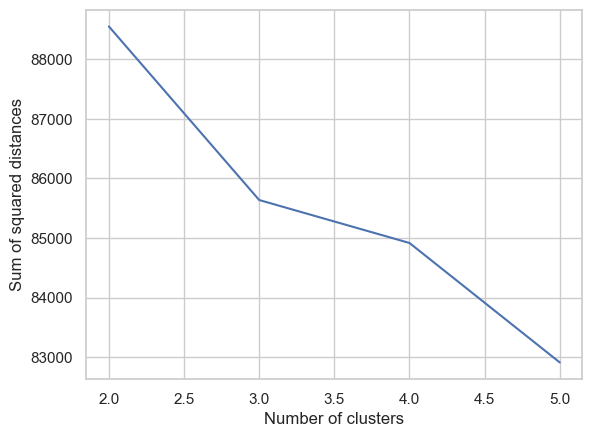

In [211]:
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
X = data_for_clustring.values
range_n_clusters = range(2, 6)
sse = []
for n_clusters in range_n_clusters:
    kmodes = KModes(n_clusters=n_clusters, init='Cao', n_init=10, verbose=0)
    kmodes.fit(X)
    sse.append(kmodes.cost_)
    
plt.plot(range_n_clusters, sse)
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distances")
plt.show()


In [212]:
k = 3
kmodes = KModes(n_clusters=k, init='Cao', n_init=10, verbose=0)
kmodes.fit(X)
labels = kmodes.labels_
data_for_clustring['cluster'] = labels


In [213]:
data_for_clustring

Entertainment_Score  Home_appliance  Telecom_Score  Income  \
0                       13               4              1       3   
1                        4               0              1       2   
2                       14              19              0       2   
3                        9              15              3       3   
4                       13              18              0       3   
...                    ...             ...            ...     ...   
28477                   15              13              3       1   
28478                   15              17              3       2   
28479                    3              11              0       2   
28480                    3               7              1       1   
28481                    5               3              1       1   

       Household_car  cluster  
0                  1        0  
1                  1        0  
2                  1        1  
3                  1        0  
4                  3        0  
...              ...      ...  
28477              0        0  
28478              1        0  
28479              0        2  
28480              0        2  
28481              0        1  

[28482 rows x 6 columns]

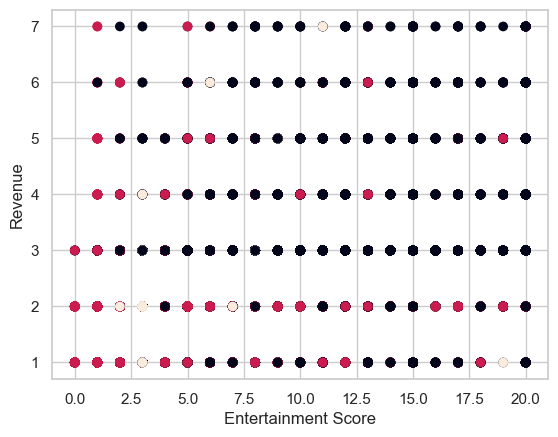

In [215]:
import matplotlib.pyplot as plt

plt.scatter(data_for_clustring['Entertainment_Score'], data_for_clustring['Income'], c=data_for_clustring['cluster'])
plt.xlabel('Entertainment Score')
plt.ylabel('Revenue')
plt.show()

In [216]:
from sklearn.metrics import silhouette_score

# Assuming you have already trained the KModes model on your data
labels = kmodes.labels_
silhouette_score = silhouette_score(data_for_clustring, labels, metric='euclidean')
print("Silhouette Score: ", silhouette_score)

Silhouette Score:  0.06544269116799371


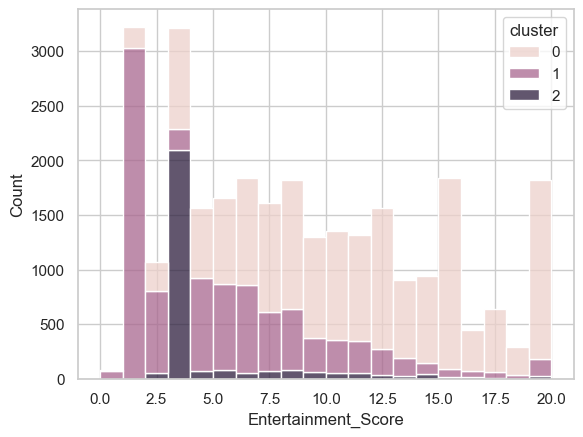

In [222]:
import seaborn as sns

sns.histplot(data_for_clustring, x='Entertainment_Score', hue='cluster', multiple='stack', bins=20)
plt.show()

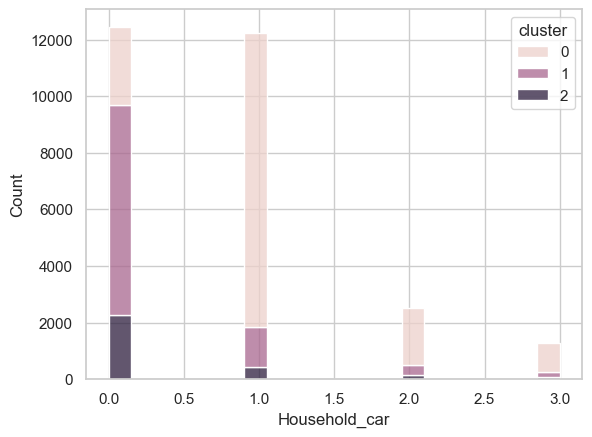

In [224]:
import seaborn as sns

sns.histplot(data_for_clustring, x="Household_car", hue='cluster', multiple='stack', bins=20)
plt.show()

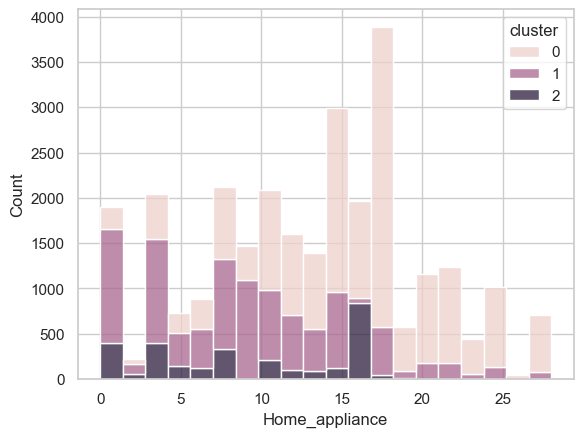

In [227]:
sns.histplot(data_for_clustring, x="Home_appliance", hue='cluster', multiple='stack', bins=20)
plt.show()

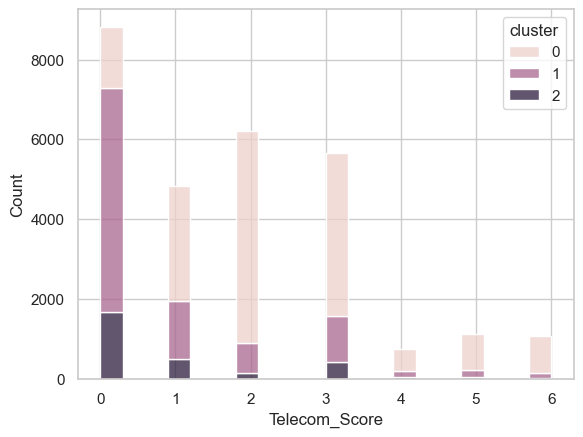

In [228]:
sns.histplot(data_for_clustring, x="Telecom_Score", hue='cluster', multiple='stack', bins=20)
plt.show()

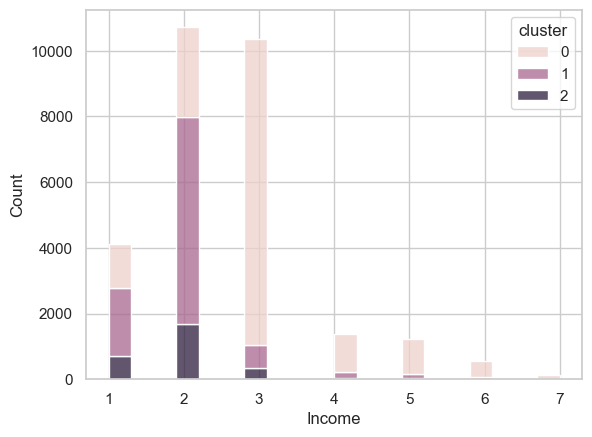

In [234]:
sns.histplot(data_for_clustring, x="Income", hue='cluster', multiple='stack', bins=20)
plt.show()

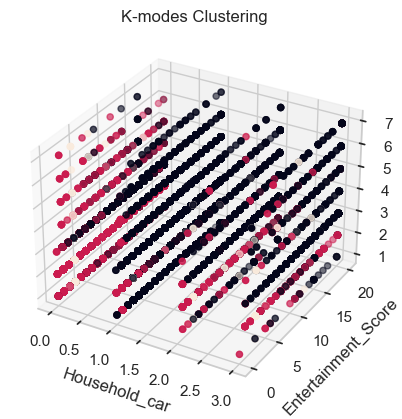

In [231]:
import matplotlib.pyplot as plt

# Assign the columns to variables for easy access
x = data_for_clustring["Household_car"]
y = data_for_clustring['Entertainment_Score']
z = data_for_clustring['Income']
color = data_for_clustring['cluster']

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=color)

# Set the axis labels and title
ax.set_xlabel("Household_car")
ax.set_ylabel('Entertainment_Score')
ax.set_zlabel('Income')
ax.set_title('K-modes Clustering')

# Display the plot
plt.show()


In [232]:
import plotly.express as px

fig = px.parallel_coordinates(data_for_clustring, color='cluster')
fig.show()

In [233]:
from kmodes.kmodes import KModes
import numpy as np
import matplotlib.pyplot as plt

# Define range of k values
k_range = range(1, 10)

# Fit KModes algorithm for each k value
kmodes = [KModes(n_clusters=k, init='Huang', n_init=10, verbose=0) for k in k_range]
sse = [kmodes[i].fit(data).cost_ for i,k in enumerate(kmodes)]

# Plot elbow curve
plt.plot(k_range, sse)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared dissimilarities')
plt.title('Elbow curve for KModes clustering')
plt.show()

KeyboardInterrupt: 

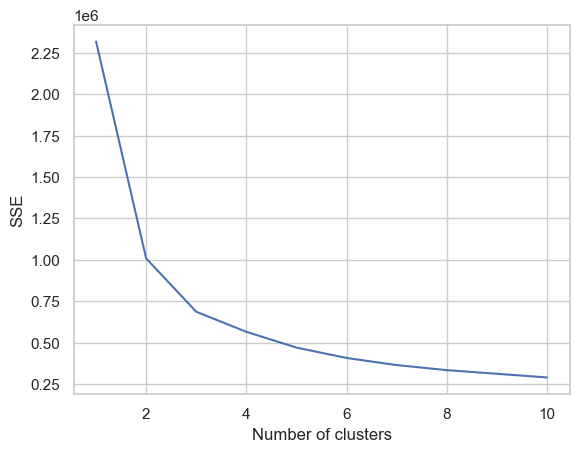

In [235]:
from sklearn.cluster import KMeans

#selecting columns


#Determine the number of clusters using elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustring)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [126]:
#Kmeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scores)

# Add cluster labels to the original DataFrame
data_for_clustring['cluster'] = kmeans.labels_
centers = kmeans.cluster_centers_

C:\Users\Anas\AppData\Local\Temp\ipykernel_3324\81543000.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_clustring['cluster'] = kmeans.labels_


In [127]:
data_for_clustring.head()

Entertainment_Score  Electromenager_Score  Telecom_Score  revenue_numeric  \
0             2.166667              0.666667       0.166667         0.428571   
1             0.666667              0.000000       0.166667         0.285714   
2             2.333333              3.166667       0.000000         0.285714   
3             1.500000              2.500000       0.500000         0.428571   
4             2.166667              3.000000       0.000000         0.428571   

   Possession_d'une_voiture_ménage  cluster  
0                         0.333333        1  
1                         0.333333        1  
2                         0.333333        1  
3                         0.333333        1  
4                         1.000000        1

D:\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 51.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 97.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 93.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 97.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 95.1% of the points cannot be placed; you may want to decrease the size of the marke

D:\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 97.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 95.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 95.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 95.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 95.3% of the points cannot be placed; you may want to decrease the size of the marke

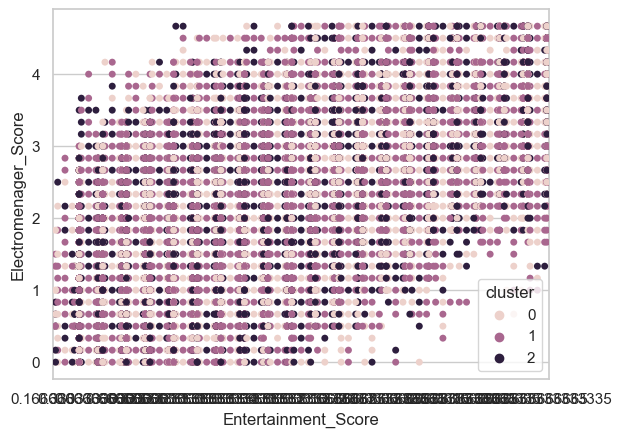

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.swarmplot(x='Entertainment_Score', y='Home_appliance', hue='cluster', data=data_for_clustring)

plt.show()

In [ ]:

# create a heatmap of the correlation between the features
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

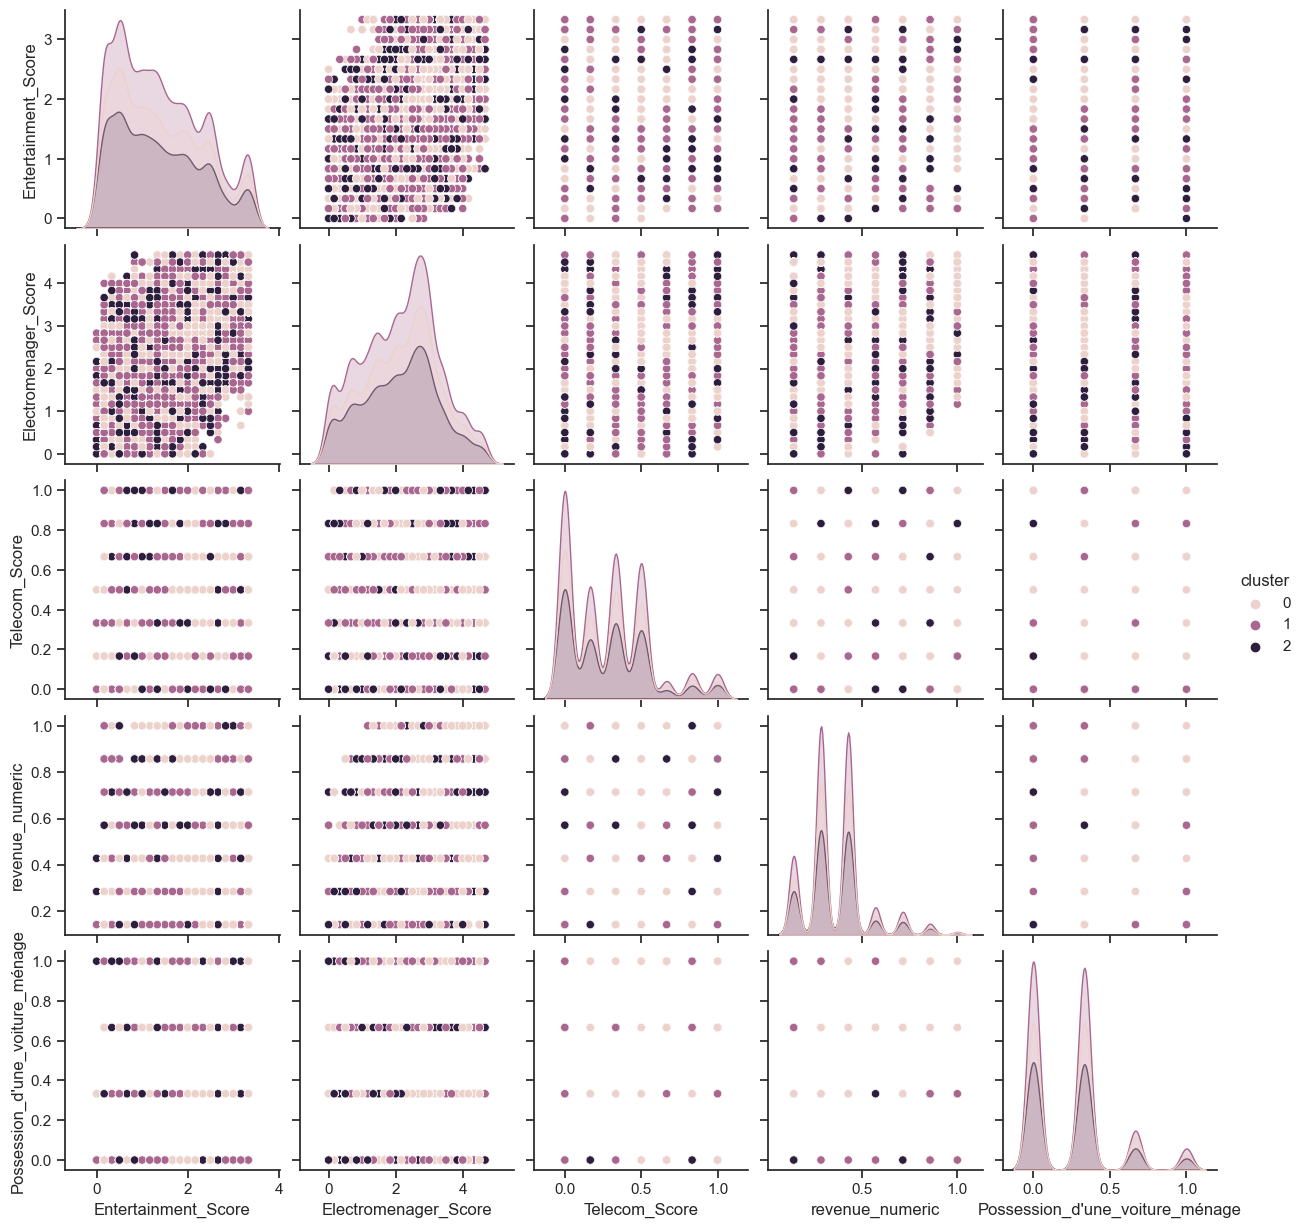

In [111]:
import seaborn as sns

sns.set(style='ticks', color_codes=True)
sns.pairplot(data_for_clustring, hue='cluster')
plt.show()

In [ ]:
X=data[['Entertainment_Score', 'Telecom_Score','Electromenager_Score']].values
labels = kmeans.labels_


In [ ]:

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot each data point and color it according to the cluster it belongs to
ax.scatter(X[:,0], X[:,1], X[:,2], c=labels.astype(np.float), s=50, alpha=0.5)

# Plot the cluster centers as black crosses
ax.scatter(centers[:,0], centers[:,1], centers[:,2], marker='x', c='black', s=200, linewidths=3)

# Set axis labels
ax.set_xlabel('Entertainment_Score')
ax.set_ylabel('Telecom_Score')
ax.set_zlabel('Electromenager_Score')

# Set title
plt.title('KMeans Clustering Results')

# Show plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Extract the cluster labels and the three columns to plot
labels = scores['cluster']
x = scores['Entertainment_Score']
y = scores['Telecom_Score']
z = scores['Electromenager_Score']

# Create a scatter plot with bubble size proportional to the number of cars
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=50, c=labels, cmap='viridis', alpha=0.8)
ax.set_xlabel('Entertainment_Score')
ax.set_ylabel('Telecom_Score')
ax.set_zlabel('Electromenager_Score')

# Add a color bar showing the cluster labels
cbar = plt.colorbar()
cbar.set_label('Cluster')


In [155]:
data.to_excel('data.xlsx', index=False)